# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727028
Nama: Refido Berliano Hartawan
Kelas: TI-4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('Top 2000 Universities of the World.csv')
data.head()

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,8,96.7
2,3,Stanford University,USA,3,10,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   World Rank                 2000 non-null   int64  
 1   Institution                2000 non-null   object 
 2   Country                    2000 non-null   object 
 3   National Rank              2000 non-null   int64  
 4   Quality of Education Rank  2000 non-null   object 
 5   Alumni Employment Rank     2000 non-null   object 
 6   Quality of Faculty Rank    2000 non-null   object 
 7   Research Performance Rank  2000 non-null   object 
 8   Score                      2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.8+ KB


,World Rank,National Rank,Score
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,67.523000,71.586450
std,577.494589,83.128615,5.079795
min,1.000000,1.000000,65.700000
25%,500.750000,10.000000,67.700000
50%,1000.500000,33.000000,70.200000
75%,1500.250000,86.000000,74.100000
max,2000.000000,347.000000,100.000000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

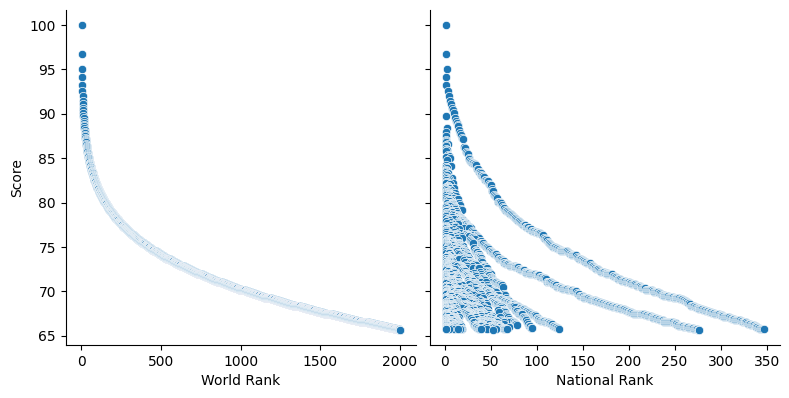

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['World Rank', 'National Rank'], 
             y_vars='Score', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

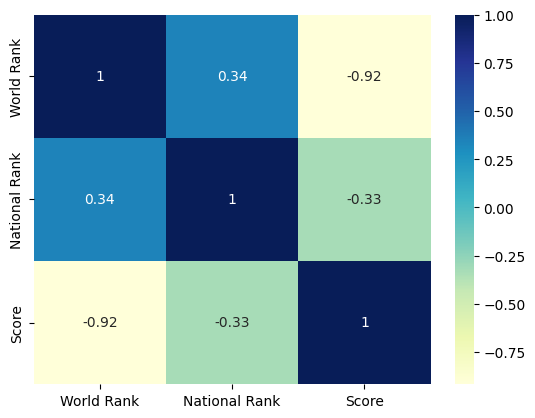

In [6]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Score memiliki korelasi yang paling kuat terhadap World Rank

### Regresi Linier

In [7]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Score']
y = data['World Rank']

In [9]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [10]:
# hasil training dtaset
X_train
y_train

773      774
1991    1992
1529    1530
746      747
78        79
        ... 
1879    1880
1895    1896
1859    1860
792      793
1544    1545
Name: World Rank, Length: 1400, dtype: int64

In [12]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [13]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    8271.562148
Score    -101.564539
dtype: float64

In [14]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             World Rank   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     6800.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:02:00   Log-Likelihood:                -9637.6
No. Observations:                1400   AIC:                         1.928e+04
Df Residuals:                    1398   BIC:                         1.929e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8271.5621     88.403     93.566      0.000    8098.145    8444.980
Score       -101.5645      1.232    -82.464      0.000    -103.981     -99.149
==============================================================================
Omnibus:                      537.837   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3037.256
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                       9.369   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

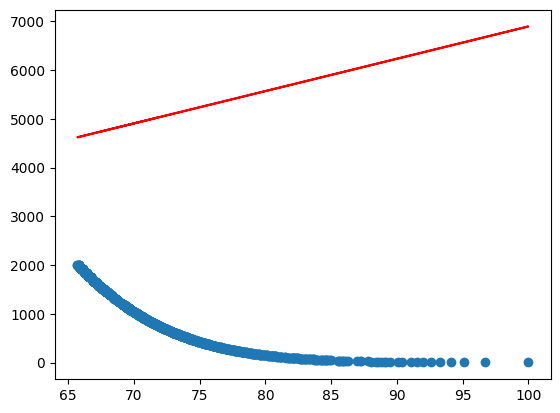

In [15]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [16]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\revid\AppData\Local\Temp\ipykernel_10148\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


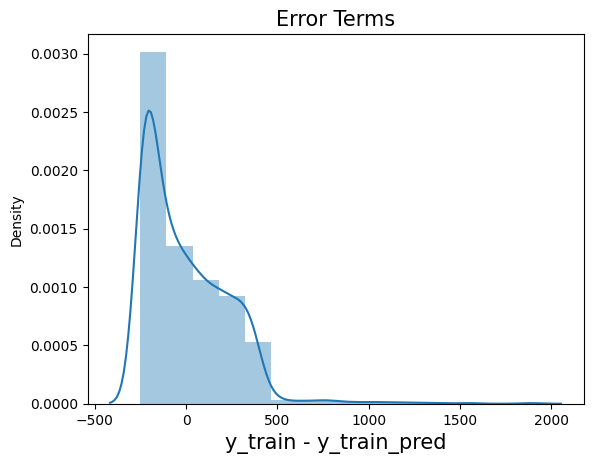

In [17]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

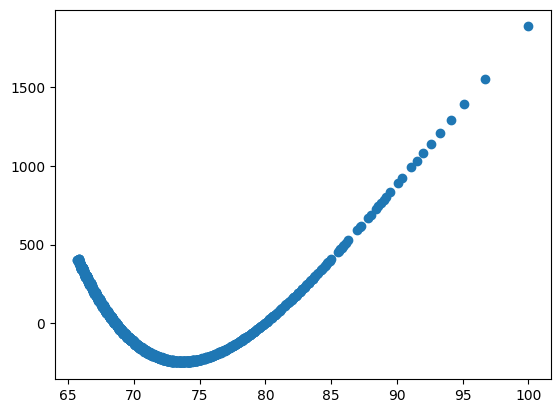

In [18]:
plt.scatter(X_train,res)
plt.show()

In [19]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

1025    1151.887980
1208    1253.452518
1055    1172.200887
367      583.126563
815     1019.854079
dtype: float64

In [20]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8639273596989542

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

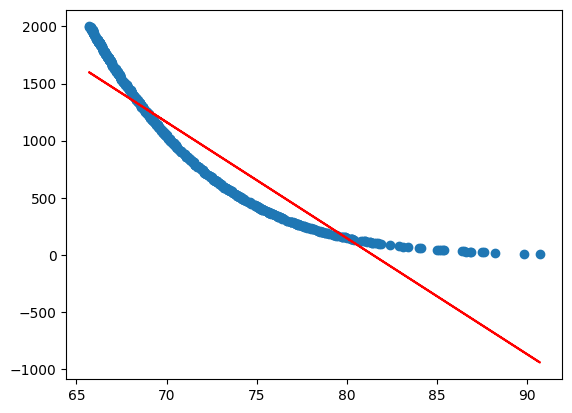

In [21]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()